Both K-means and dbscan algorithm has been used on the input dataset1. 

The number of clusters using elbow method comes out to be 4 as the SSE v/s number of clusters curve tends to become horizontal at 4.  But the parameters of the DBSacn algo have been chosen such that we get the number of clusters as 2, since on separation in terms of density, the number of clusters should be 2. 

Data has been plotted with different colours.

DBScan doesn’t need parameter k, the number of clusters we are trying to find, which KMeans needs. When we don’t know the number of clusters hidden in the dataset and there’s no way to visualize the dataset, it’s a good decision to use DBScan. DBSCAN produces a varying number of clusters, based on the input data. DBScan can even find a cluster completely surrounded by (but not connected to) a different cluster, but In K-Means, it could be misclassified.

But, KMeans is much faster than DBScan as DBscan calculates distance (euclidian most of the times) and it may suffer from Curse of dimensionality for large datsets. Also, DBScan doesn’t work well over clusters with different densities, and we need to choose the DBScan parameters carefully.

Overall, it depends on the data and utility to decide which algorithm to use.


In [1]:
from math import pow, sqrt
import ast
from sklearn.metrics import silhouette_score
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

/usr/local/lib/python2.7/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [2]:
class Point(object):
    def __init__(self,feat_vector):
     
        self.feat_vector = feat_vector
        self.cluster = None
        self.visited = False

    def __str__(self):
        return str(self.feat_vector)


def euclidean_dist(x,y):
    assert len(x) == len(y)
    sum = 0.0
    for i in xrange(len(x)):
        sum += pow(x[i] - y[i],2)
    return sqrt(sum)

def adjoining_neighbours(point, all_points, epsilon, distance):
    ''' find the immediate neighbours of point.'''
    neighbours = []
    for p in all_points:
        if p == point:
            # own neighbour
            continue
        d = distance(point.feat_vector,p.feat_vector)
        if d < epsilon:
            neighbours.append(p)
    return neighbours

def density_connected(points, all_points, epsilon, min_pts, current_cluster, distance):
    ''' find every point in the set of all_points which are density-connected, starting with the initial points list. '''
    cluster_points = []
    for point in points:
        if not point.visited:
            point.visited = True
            new_points = adjoining_neighbours(point, all_points, epsilon, distance)
            if len(new_points) >= min_pts:                                
                # append any new points on the end of the list we're
                # already iterating over.
                for p in new_points:
                    if p not in points:
                        points.append(p)

        if not point.cluster:
            cluster_points.append(point)
            point.cluster = current_cluster
    
    return cluster_points

def dbscan(points, epsilon, min_pts, distance=euclidean_dist):
    ''' Dbscan algo with list of feature vectors, a radius epsilon, min_pts: min neighbours a point must have within the radius epsilon to be considered connected. '''

    assert isinstance(points, list)
    epsilon = float(epsilon)
    if not isinstance(points[0], Point):
        points = [Point(point) for point in points]
    
    clusters = {}     
    clusters[-1] = []
    current_cluster = -1
    ind=0
    for point in points:
        point_dict[str(point)]=ind
        ind=ind+1
        if not point.visited:
            point.visited = True
            neighbours = adjoining_neighbours(point, points, epsilon, distance)
            if len(neighbours) >= min_pts:
                current_cluster += 1

                point.cluster = current_cluster                
                cluster = [point,]
                cluster.extend(density_connected(neighbours, points, epsilon, min_pts, 
                                             current_cluster, distance))
                clusters[current_cluster] = cluster

            else:
                clusters[-1].append(point)
                print '\nPoint %s is not having density-connected neighbours.' % str(point.feat_vector)

    cluster_data = {}
    for cluster, members in clusters.iteritems():
        cluster_data[cluster] = [member.feat_vector for member in members]
    return cluster_data


In [3]:
 #Selecting epsilon and min_pts value as per the dataset.
epsilon = 0.04
min_pts = 5.0
points = []
points1 = []
index_mapping={}

dataset=pd.read_csv("dataset1.txt",delimiter=" ", names=["x","y"])
for index, row in dataset.iterrows():
    points.append([float(row['x']), float(row['y'])])
    index_mapping[str(row['x']) + str(row['y'])] = index 

point_dict={}


X=np.array(points)
clusters = dbscan(points, epsilon, min_pts) #Calculate the clusters of the given points, with epsilon and min_pts values.

#print clusters
pt={}

for key, value in clusters.iteritems():
        for i in value:
            pt[point_dict[str(i)]]=key

#print pt.values()
    #print point_dict

#Print clusters and their respective points.
for cluster, members in clusters.iteritems():
    print '\nCluster: %d' % cluster
    for point in members:
        print point


Cluster: 0
[1.4890339920700002, -0.37226472736199995]
[1.4556759384600002, -0.39014574037699995]
[1.5216915091999998, -0.35313420352700003]
[1.47799013849, -0.37836520167]
[1.5, -0.366025403784]
[1.46687019725, -0.38432585561899996]
[1.51088641669, -0.359648224128]
[1.4890339920700002, -0.37226472736199995]
[1.43307160745, -0.401359519184]
[1.44440914403, -0.395823929522]
[1.42166513345, -0.40675162819399996]
[1.5430508550100002, -0.339699808785]
[1.5324135575600002, -0.34648437890100003]
[1.5536017082700002, -0.332781573164]
[1.41019153775, -0.41199939822400006]
[1.39865264674, -0.41710199391900005]
[1.3870502972, -0.422058603038]
[1.57443737821, -0.31854853155499996]
[1.56406443783, -0.325730773299]
[1.58471887822, -0.311235991219]
[1.37538633604, -0.42686843657300005]
[1.3636626199500002, -0.43153072888300004]
[1.3518810151299998, -0.43604473781400005]
[1.59490730123, -0.303794316318]
[1.60500102541, -0.296224691438]
[1.61499844402, -0.28852832153]
[1.34004339702, -0.44040974481399

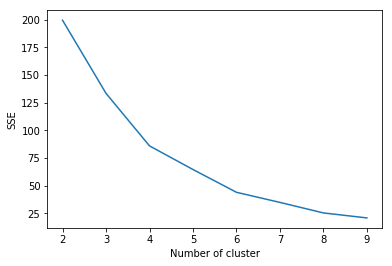

In [4]:
#Apply kmeans on dataset1 and find the optimal number of clusters using elbow method.

kmeans2 = KMeans(n_clusters=2, random_state=0).fit(np.array(points))
centers2 = kmeans2.cluster_centers_

sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(np.array(points))
    
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ #Sum of distances of samples to their closest cluster center
    
#Plot the elbow curve
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

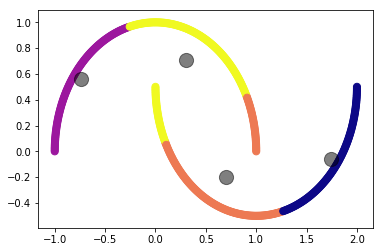

In [5]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(np.array(points))

y_kmeans = kmeans.predict(np.array(points))

#Plot K-means cluster with k=4
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='plasma')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

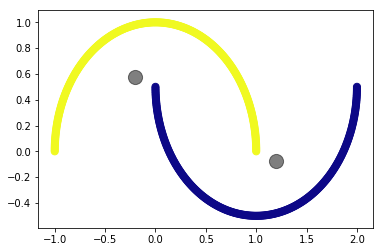

In [6]:
#Plot DBScan cluster with parameters that lead to k=2
plt.scatter(X[:, 0], X[:, 1], c=pt.values(), s=50, cmap='plasma')


plt.scatter( centers2[:, 0], centers2[:, 1],c='black', s=200, alpha=0.5)
plt.show()


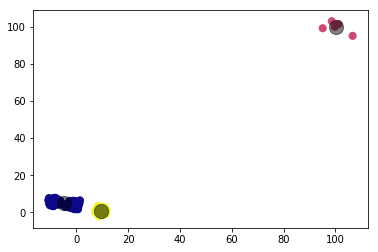

In [7]:
#Plot DBScan and K-means graphs for dataset2
dataset=pd.read_csv("dataset2.txt",delimiter=" ", names=["x","y"])
for index, row in dataset.iterrows():
    points1.append([float(row['x']), float(row['y'])])
    index_mapping[str(row['x']) + str(row['y'])] = index

#Plot k-means graph
kmeans = KMeans(n_clusters=3, random_state=0).fit(np.array(points1))

y_kmeans = kmeans.predict(np.array(points1))
X=np.array(points1)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='plasma')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()


Point [9.359070987660001, 0.337273059948] is not having density-connected neighbours.

Point [-1.13610440162, 4.2292637786] is not having density-connected neighbours.

Point [-1.8180840692700002, 4.6519846932] is not having density-connected neighbours.

Point [-8.952252092330001, 5.9837623827] is not having density-connected neighbours.

Point [-6.63603982032, 5.60680144477] is not having density-connected neighbours.

Point [0.724705013197, 2.21967233752] is not having density-connected neighbours.

Point [-0.9370016673370001, 3.73305426581] is not having density-connected neighbours.

Point [10.3384244495, 0.919345104507] is not having density-connected neighbours.

Point [10.6858637491, 0.940408223059] is not having density-connected neighbours.

Point [-2.08748915556, 4.967503100959999] is not having density-connected neighbours.

Point [-1.00820718678, 5.35358118771] is not having density-connected neighbours.

Point [-1.9792047621700002, 3.68672066292] is not having density-co


Point [-2.36172103961, 5.084752465919999] is not having density-connected neighbours.

Point [-1.2270822716299998, 4.12416847137] is not having density-connected neighbours.

Point [-1.8328980494999998, 3.48111833835] is not having density-connected neighbours.

Point [-1.71799259625, 4.698783317159999] is not having density-connected neighbours.

Point [9.455416191989999, 0.781745927791] is not having density-connected neighbours.

Point [10.2598576036, 2.71852995722] is not having density-connected neighbours.

Point [0.427745904785, 3.73262938504] is not having density-connected neighbours.

Point [10.809367953399999, 2.45830320476] is not having density-connected neighbours.

Point [-7.51275774891, 6.15915301704] is not having density-connected neighbours.

Point [-7.63310097038, 5.418389443550001] is not having density-connected neighbours.

Point [0.131408017384, 4.50923336829] is not having density-connected neighbours.

Point [8.93126853783, 0.0924781703305] is not having dens


Point [-7.877693659269999, 5.54418565878] is not having density-connected neighbours.

Point [8.65153438743, -0.135324159883] is not having density-connected neighbours.

Point [-0.09325875685030001, 4.306055162430001] is not having density-connected neighbours.

Point [-8.64078394925, 5.368571912109999] is not having density-connected neighbours.

Point [10.784447353, 2.93418947155] is not having density-connected neighbours.

Point [-1.00461569458, 5.594258138890001] is not having density-connected neighbours.

Point [-0.701920879675, 4.72500819064] is not having density-connected neighbours.

Point [9.82761971878, -0.877172936292] is not having density-connected neighbours.

Point [-7.1917415875, 4.64718538671] is not having density-connected neighbours.

Point [8.97037656157, 1.3980770064399999] is not having density-connected neighbours.

Point [9.37567041459, 1.6980486855799999] is not having density-connected neighbours.

Point [-1.13514078802, 3.6331311865699996] is not having

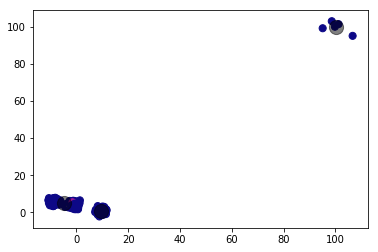

In [8]:
point_dict={}

#Plot Dbscan graphs with custom chosen parameters.
clusters = dbscan(points1, 0.06, 2.0)
print clusters.keys()
pt={}

for key, value in clusters.iteritems():
        for i in value:
            pt[point_dict[str(i)]]=key

plt.scatter(X[:, 0], X[:, 1], c=pt.values(), s=50, cmap='plasma')


plt.scatter( centers[:, 0], centers[:, 1],c='black', s=200, alpha=0.5)
plt.show()